# TEDx

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns; sns.set()
from urllib.request import urlretrieve
from IPython.display import clear_output
import cv2
from PIL import Image
from sklearn.metrics.cluster import entropy as sklearn_entropy
from skimage import io, color, img_as_ubyte
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import string
from textblob import TextBlob
import traceback
import json
import requests
import time
from bs4 import BeautifulSoup

In [2]:
df = pd.read_excel("data/data_ted.xlsx")
df.head()

,Licensees.name,Events.name,Videos.id,Videos.videoid,Videos.title,Videos.url,Videos.url_img,Videos.description,Videos.published_at,Videos.channelid,Videos.channel_title,Videos.tags,Videos.view_count,Videos.like_count,Videos.dislike_count,Videos.comment_count,Videos.users_id,Videos.licensees_id,Videos.created,Videos.modified
0,TEDxRíodelaPlata,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,qJzRzdsGhC0,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://www.youtube.com/watch?v=qJzRzdsGhC0,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,Para más videos de TEDxRíodelaPlata: http://ww...,2013-10-03 12:55:37,UC2cxH4jnmI8DsosmHtCbR0Q,TEDxRiodelaPlata,NaN,2535385,13638,247,638,3f27df36-f72f-4466-bb82-ec9ecbdc95f8,NaN,2017-12-06 18:32:44,2018-06-03 18:11:24
1,TEDxRíodelaPlata,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,EFdEmbuikOw,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://www.youtube.com/watch?v=EFdEmbuikOw,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,Para más charlas de TEDxRíodelaPlata: http://w...,2013-10-31 19:51:19,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:54:54,2018-06-03 18:11:27
2,TEDxRíodelaPlata,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,nZV1uefYywI,Sobre fideos y jabones: Luciano Mellera at TED...,https://www.youtube.com/watch?v=nZV1uefYywI,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,Más info en www.tedxriodelaplata.org.\nLuciano...,2011-06-01 17:30:41,UC-yTB2bUcin9mmah36sXiYA,TEDxYouth,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-12-04 16:50:37,2018-06-03 18:11:23
3,TEDxRíodelaPlata,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,jej8qlzlAGw,Las matematicas son para siempre | Eduardo Sae...,https://www.youtube.com/watch?v=jej8qlzlAGw,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,Never miss a talk! SUBSCRIBE to the TEDx chann...,2014-10-14 10:50:29,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:54:58,2018-06-03 18:11:27
4,TEDxRíodelaPlata,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,c1iMoel2LxA,Secretos de la relación corazón-cerebro | Luci...,https://www.youtube.com/watch?v=c1iMoel2LxA,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,¿Cómo se relacionan el cerebro con el corazón?...,2015-11-04 18:54:43,UCsT0YIqwnpJCM-mx7-gSA4Q,TEDx Talks,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,3f9a6843-2784-4b94-9c41-2b38b8296702,NaN,2017-10-06 13:55:08,2018-06-03 18:11:27


In [3]:
df.columns

Index(['Licensees.name', 'Events.name', 'Videos.id', 'Videos.videoid',
       'Videos.title', 'Videos.url', 'Videos.url_img', 'Videos.description',
       'Videos.published_at', 'Videos.channelid', 'Videos.channel_title',
       'Videos.tags', 'Videos.view_count', 'Videos.like_count',
       'Videos.dislike_count', 'Videos.comment_count', 'Videos.users_id',
       'Videos.licensees_id', 'Videos.created', 'Videos.modified'],
      dtype='object')

In [4]:
df.nunique()

Licensees.name            1
Events.name              15
Videos.id               265
Videos.videoid          265
Videos.title            265
Videos.url              265
Videos.url_img          265
Videos.description      257
Videos.published_at     259
Videos.channelid          3
Videos.channel_title      3
Videos.tags             240
Videos.view_count       265
Videos.like_count       217
Videos.dislike_count     82
Videos.comment_count     97
Videos.users_id           5
Videos.licensees_id       0
Videos.created          183
Videos.modified           7
dtype: int64

In [5]:
df = df.drop(['Licensees.name', 'Videos.licensees_id'], axis=1)

In [6]:
df['Events.name'].unique()

array(['CanalTEDxRiodelaPlata', 'TEDxRiodelaPlata2013',
       'TEDxJoven@RiodelaPlata 2011', 'TEDxRiodelaPlata2014',
       'TEDxRiodelaPlata2015', 'TEDxRiodelaPlata2011',
       'TEDxRiodelaPlata2017', 'TEDxRiodelaPlataED2015',
       'TEDxRiodelaPlata2016', 'TEDxRiodelaPlata2012', 'TEDxChange',
       'TEDxBuenosAires2010', 'TEDxJoven@RiodelaPlata 2012',
       'TEDxRiodelaPlata2010', 'TEDxRiodelaPlataSalon2016'], dtype=object)

In [7]:
def graph_categorical_dist(feature, rotation=False):
    fig, ax = plt.subplots(figsize=(30,15))
    sns.countplot(data=df, x=feature)
    plt.xlabel(feature, fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.title('Distribution of %s' % feature, fontsize=25)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        if rotation:
            tick.label.set_rotation(rotation)
    sns.despine()
    plt.plot();

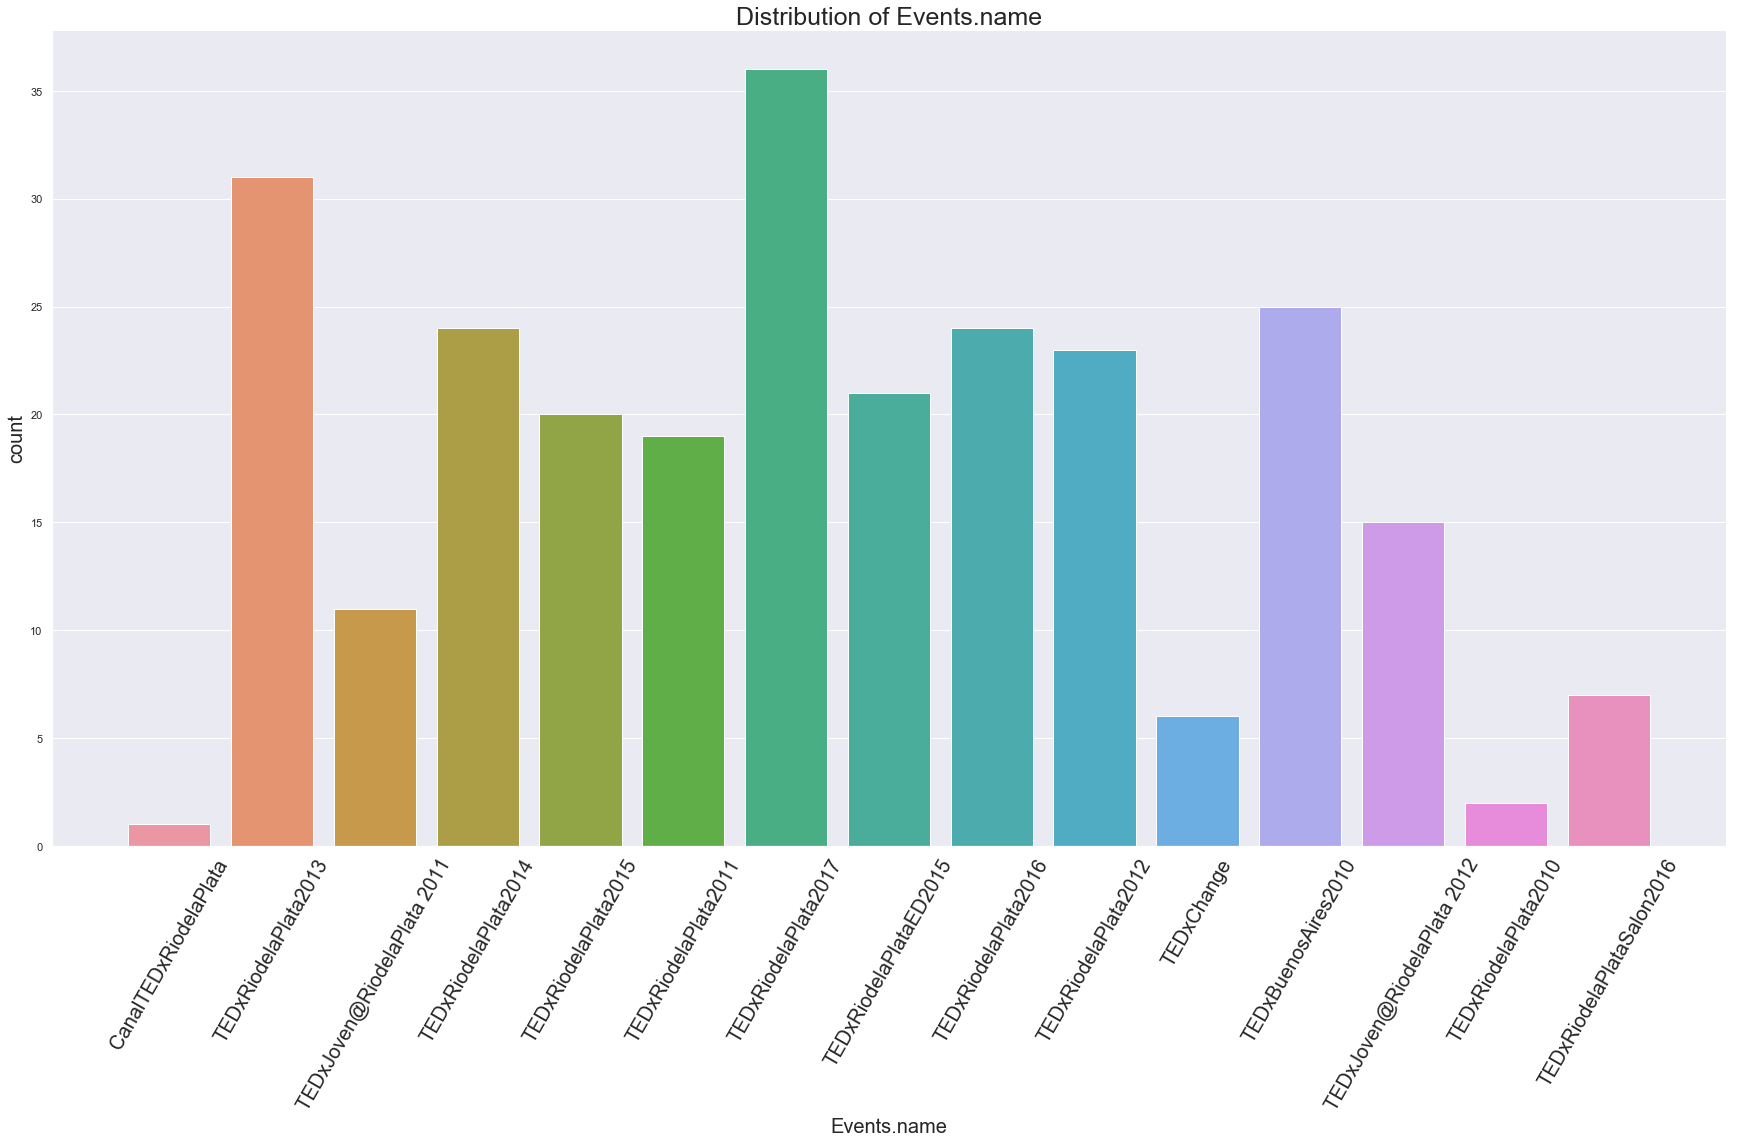

In [8]:
graph_categorical_dist('Events.name', rotation=60)

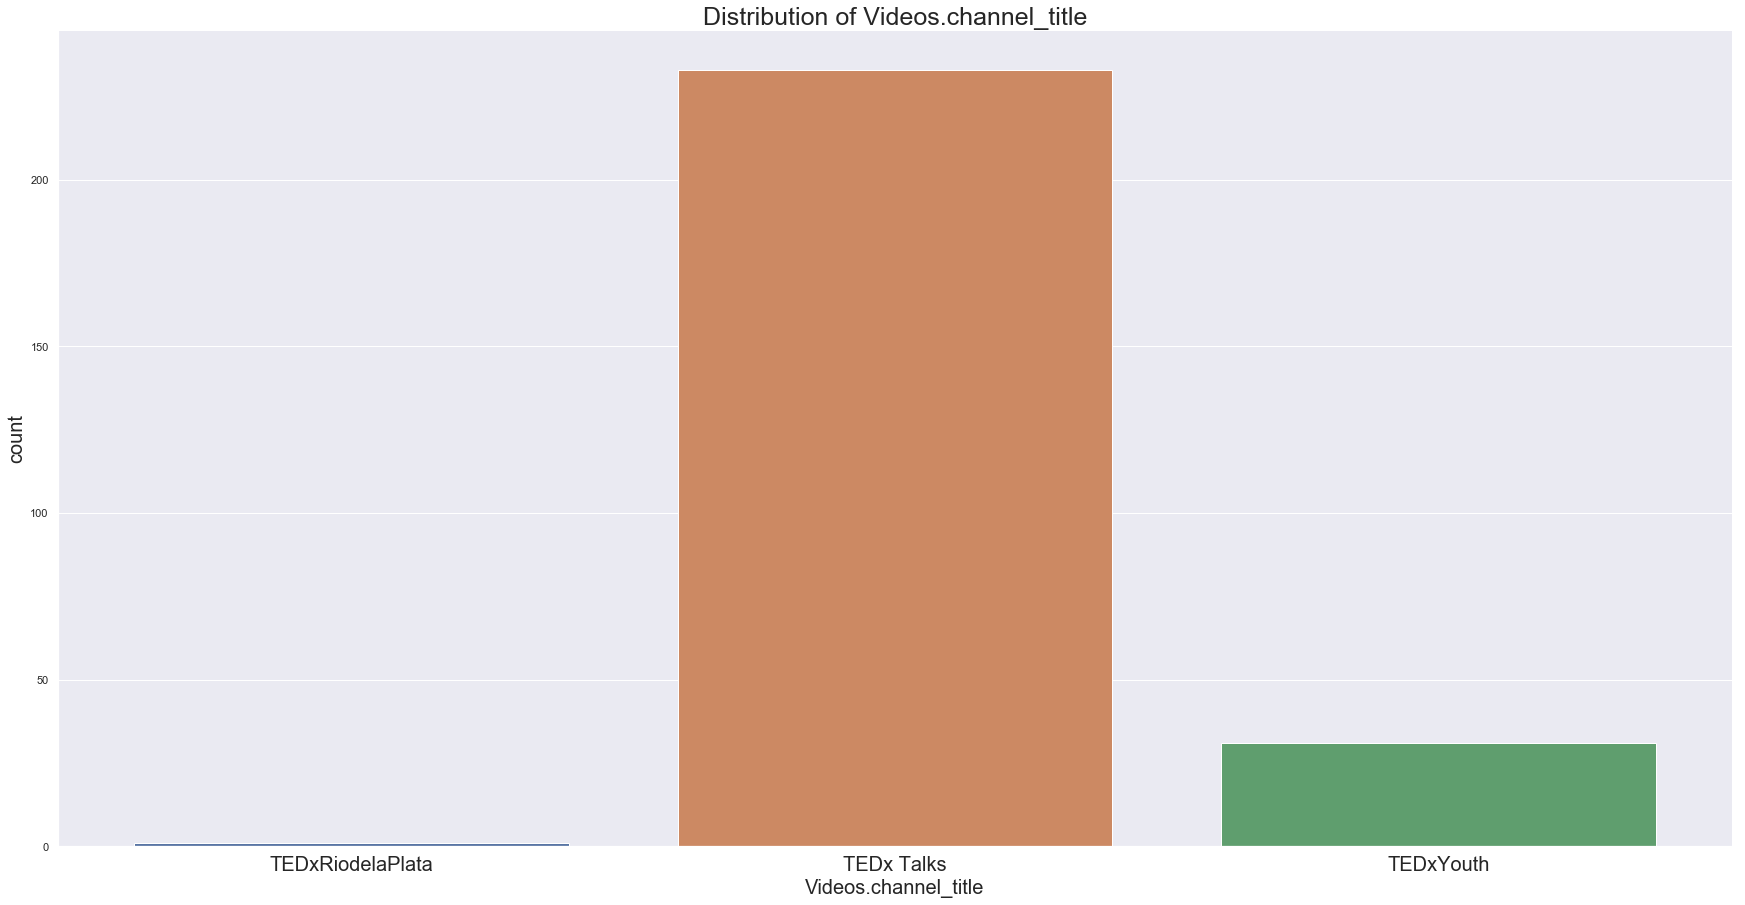

In [9]:
graph_categorical_dist('Videos.channel_title')

In [10]:
df = df.drop(['Videos.videoid','Videos.url', 'Videos.description','Videos.users_id', 'Videos.published_at', 'Videos.channelid', 'Videos.channel_title','Videos.modified'], axis=1)

In [11]:
df.columns = ['event_name', 'video_id', 'title', 'url_thumb',
       'tags', 'view_count', 'like_count',
       'dislike_count', 'comment_count', 'created']
df.head()

,event_name,video_id,title,url_thumb,tags,view_count,like_count,dislike_count,comment_count,created
0,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,NaN,2535385,13638,247,638,2017-12-06 18:32:44
1,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,2017-10-06 13:54:54
2,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,Sobre fideos y jabones: Luciano Mellera at TED...,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,2017-12-04 16:50:37
3,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,Las matematicas son para siempre | Eduardo Sae...,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,2017-10-06 13:54:58
4,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,Secretos de la relación corazón-cerebro | Luci...,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,2017-10-06 13:55:08


Meta features from thumbnails: blurriness (e.g., CannyEdge, Laplace Frequency), brightness, contrast (e.g., tone), overexposure, and entropy of the thumbnail.
blurriness: https://www.pyimagesearch.com/2015/09/07/blur-detection-with-opencv/

?saturacion, profundidad de campo, balance de blancos, r, g y b, ruido, 

In [12]:
df['blurriness'] = 0.0
df['brightness'] = 0.0
df['contrast'] = 0.0  # HOW?!
df['overexposure'] = 0.0  # HOW?
df['entropy'] = 0.0
df['avg_color'] = np.empty((len(df), 0)).tolist()

In [13]:
def blurriness(path):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    image = cv2.imread(path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return cv2.Laplacian(image, cv2.CV_64F).var()


def brightness(path):
    image = Image.open(path)
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

def avg_color(path):
    img = Image.open(path)
    width, height = img.size

    r_total = 0
    g_total = 0
    b_total = 0

    count = 0
    for x in range(0, width):
        for y in range(0, height):
            r, g, b = img.getpixel((x,y))
            r_total += r
            g_total += g
            b_total += b
            count += 1

    return (r_total/count, g_total/count, b_total/count)

def entropy(path):
    rgbImg = io.imread(path)
    grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
    return sklearn_entropy(grayImg)

In [14]:
for i, row in df.iterrows():
    name = row['url_thumb'].split('/')[-2]
    link = row['url_thumb']
    path = "data/thumbnails/%s.jpg" % name
    urlretrieve(link, path)
    clear_output(wait=True)
    print("Retrieved %s: %d" % (name, i))
    df.at[i, 'blurriness'] = blurriness(path)
    print("Computed blurriness %s: %d" % (name, i))
    df.at[i, 'brightness'] = brightness(path)
    print("Computed brightness %s: %d" % (name, i))    
    df.at[i, 'avg_color'] = avg_color(path)
    print("Computed avg_color %s: %d" % (name, i))
    df.at[i, 'entropy'] = entropy(path)
    print("Computed entropy %s: %d" % (name, i))

Retrieved M-QkaJSMR9M: 264
Computed blurriness M-QkaJSMR9M: 264
Computed brightness M-QkaJSMR9M: 264
Computed avg_color M-QkaJSMR9M: 264
Computed entropy M-QkaJSMR9M: 264


In [15]:
df

,event_name,video_id,title,url_thumb,tags,view_count,like_count,dislike_count,comment_count,created,blurriness,brightness,contrast,overexposure,entropy,avg_color
0,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,NaN,2535385,13638,247,638,2017-12-06 18:32:44,190.290027,0.185805,0.0,0.0,4.230425,"(58.749155092592595, 44.37039351851852, 37.902..."
1,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,2017-10-06 13:54:54,231.822471,0.138591,0.0,0.0,3.954216,"(52.247876157407404, 28.919444444444444, 27.76..."
2,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,Sobre fideos y jabones: Luciano Mellera at TED...,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,2017-12-04 16:50:37,898.548210,0.103526,0.0,0.0,3.428580,"(40.45034722222222, 20.933836805555554, 20.933..."
3,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,Las matematicas son para siempre | Eduardo Sae...,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,2017-10-06 13:54:58,81.858510,0.132854,0.0,0.0,3.941090,"(29.329189814814814, 33.29795717592592, 53.253..."
4,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,Secretos de la relación corazón-cerebro | Luci...,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,2017-10-06 13:55:08,95.297744,0.158391,0.0,0.0,4.243174,"(33.96541666666667, 41.46484953703704, 57.2380..."
5,TEDxJoven@RiodelaPlata 2011,a2d8a540-08d0-4e69-9ff6-c2331680a840,El placer de tener un problema no resuelto en ...,https://i.ytimg.com/vi/ARXdEMbPTGs/hqdefault.jpg,"Adrián,Paenza,Argentina,Buenos Aires,Spanish,E...",659262,5097,121,204,2017-09-08 17:57:19,197.823953,0.111513,0.0,0.0,3.381906,"(24.826469907407407, 34.61456597222222, 9.4833..."
6,TEDxRiodelaPlata2015,b172e3e0-cb3e-45ce-98fe-f832eb669b4b,La risa de las ideas | Luciano Mellera | TEDxR...,https://i.ytimg.com/vi/aipFCUURJSg/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Entertainment,Humor",644431,5175,197,88,2017-10-06 13:55:08,424.975498,0.157499,0.0,0.0,4.112527,"(40.43391203703704, 39.444068287037034, 48.070..."
7,TEDxRiodelaPlata2011,1a437a0a-1642-4806-a548-97217696d078,Cómo matar al intermediario | Hernán Casciari ...,https://i.ytimg.com/vi/_VEYn3bXz34/hqdefault.jpg,"Activism,Media,ted x,Editorial Orsai,tedx,Comm...",603430,8565,153,429,2017-09-13 13:58:28,1871.278738,0.372828,0.0,0.0,4.681712,"(100.65532407407407, 94.58571180555556, 89.664..."
8,TEDxRiodelaPlata2017,ccc6e321-b621-41d8-93f7-ab9d57890b2e,¿Y te vas a quedar acá? | Radagast | TEDxJove...,https://i.ytimg.com/vi/IIh9LpMORD0/hqdefault.jpg,"TEDxTalks,Spanish,Life,Creativity,Curiosity,En...",595525,12089,321,191,2017-11-21 18:34:30,477.708651,0.098628,0.0,0.0,3.000547,"(54.743917824074074, 12.541047453703703, 16.57..."
9,TEDxRiodelaPlataED2015,05019150-ff66-433c-b04f-a449806aedae,Profesores que dejan marca | Oscar Ghillione |...,https://i.ytimg.com/vi/WVEnhecsj3Y/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Education,TEDxRíod...",589537,5797,188,172,2017-10-06 13:55:24,230.702071,0.167903,0.0,0.0,3.259488,"(53.93347800925926, 38.723946759259256, 38.508..."


word count, punctuation count, character count, Google hits (e.g., if the title is entered into the Google search engine how many results are found), and the Sentiment/Subjectivity of the title computed using Vader [30], and TextBlob.


In [16]:
df.title.sample(10)

142    Bullying -- de la culpa a la vergüenza | Paula...
219    Mis alumnos y las calles del pueblo | Miguel Á...
29     Te invito a creer: Manuel Lozano at TEDxRiodel...
254    Transformar la educación en América Latina | G...
31     La puerta equivocada | Adrián Paenza | TEDxRio...
127    Los reflejos emocionales | Hernán Laperuta | T...
50     No todo es puro verso | Cristina Domenech | TE...
131    TEDxBuenosAires - Marcelo Moguilevsky  - 04/08/10
168    ¿De qué hablan los delfines? | Marcelo Magnasc...
148    TEDxBuenosAires - Mercedes Salado Puerto - 04/...
Name: title, dtype: object

In [86]:
df['word_count'] = 0
df['punctuation_count'] = 0
df['character_count'] = 0
df['google_hits'] = 0
df['sentiment_vader'] = 0.0
df['sentiment_blob_polarity'] = 0.0
df['sentiment_blob_subjectivity'] = 0.0

In [92]:
def get_hits(searchfor):
    try:
        r = requests.get('http://www.google.com/search',
                         params={'q':'%s' % searchfor,
                                 "tbs":"li:1", # Google doesn't guess for alternative searchs
                                "hl": 'en'}
                        )
        time.sleep(3)  # So google doesn't think we're bots. Wait, but we are...
        soup = BeautifulSoup(r.text, "lxml")
        hits_string = soup.find('div',{'id':'resultStats'}).text
        hits = int(''.join([c for c in hits_string if c.isdigit()]))
    except Exception as e:
        print(e)
        print(searchfor)
        print(hits_string)
        raise e
    if hits == -1:
        print(r)
        print(hits_string)
    return hits

In [94]:
words_series = df.title.str.strip().str.split('[\W_]+')
analyzer = SentimentIntensityAnalyzer()
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
for i, row in df.iterrows():
    df.at[i, 'word_count'] = len(list(filter(None, words_series.loc[i])))
    df.at[i, 'punctuation_count'] = count(row['title'],set(string.punctuation))
    df.at[i, 'character_count'] = len(row['title'])
    if row['google_hits'] <= 0: # Sensitive, let's not recalculate in case google shuts our ip down.
        df.at[i, 'google_hits'] = get_hits(row['title'])
        df.to_csv("draft_saved_just_in_case.csv")
    df.at[i, 'sentiment_vader'] = analyzer.polarity_scores(row['title'])['compound']
    df.at[i, 'sentiment_blob_polarity'] = TextBlob(row['title']).sentiment.polarity
    df.at[i, 'sentiment_blob_subjectivity'] = TextBlob(row['title']).sentiment.subjectivity
    clear_output(wait=True)
    print(i, row['title'], df.at[i, 'google_hits'])


264 Performance | Saxaje | TEDxRiodelaPlataED 8230000000


In [98]:
# df.to_csv('data/processed_v1.csv')

In [102]:
# df = pd.read_csv("data/processed_v1.csv", index_col=[0])

In [103]:
df

,event_name,video_id,title,url_thumb,tags,view_count,like_count,dislike_count,comment_count,created,...,overexposure,entropy,avg_color,word_count,punctuation_count,character_count,google_hits,sentiment_vader,sentiment_blob_polarity,sentiment_blob_subjectivity
0,CanalTEDxRiodelaPlata,72321a94-f58e-47a2-9071-40a5ae54091e,Flash Mob en TEDxRiodelaPlata 2013 - El Brindi...,https://i.ytimg.com/vi/qJzRzdsGhC0/hqdefault.jpg,NaN,2535385,13638,247,638,2017-12-06 18:32:44,...,0.0,4.230425,"(58.749155092592595, 44.37039351851852, 37.902...",12,1,71,14400,0.0000,0.000000,0.000000
1,TEDxRiodelaPlata2013,ea1705b1-2eb7-4782-a9d3-4f88fcc0de5a,Nunca pidas permiso | Ronald Shakespear | TEDx...,https://i.ytimg.com/vi/EFdEmbuikOw/hqdefault.jpg,"Diseño,TEDx,Español,tedx talks,Logos,tedx,Hist...",1449486,14672,957,651,2017-10-06 13:54:54,...,0.0,3.954216,"(52.247876157407404, 28.919444444444444, 27.76...",6,2,58,8320,0.0000,0.000000,0.000000
2,TEDxJoven@RiodelaPlata 2011,54489a1b-12e8-4e5a-b9aa-bba37452309d,Sobre fideos y jabones: Luciano Mellera at TED...,https://i.ytimg.com/vi/nZV1uefYywI/hqdefault.jpg,"Luciano,Mellera,Argentina,Buenos Aires,Spanish...",1037443,5648,233,256,2017-12-04 16:50:37,...,0.0,3.428580,"(40.45034722222222, 20.933836805555554, 20.933...",9,2,65,1610,0.0000,0.000000,0.000000
3,TEDxRiodelaPlata2014,e5a40182-5cec-4e28-afe6-784750a83cd3,Las matematicas son para siempre | Eduardo Sae...,https://i.ytimg.com/vi/jej8qlzlAGw/hqdefault.jpg,"tedx talk,Science (hard),Culture,Spanish,Mathe...",902644,28715,283,607,2017-10-06 13:54:58,...,0.0,3.941090,"(29.329189814814814, 33.29795717592592, 53.253...",10,2,78,20500,0.0000,0.000000,0.000000
4,TEDxRiodelaPlata2015,ea927c7b-c454-4fa4-ae54-86900daa0fff,Secretos de la relación corazón-cerebro | Luci...,https://i.ytimg.com/vi/c1iMoel2LxA/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Science (hard),Bra...",879428,14275,498,198,2017-10-06 13:55:08,...,0.0,4.243174,"(33.96541666666667, 41.46484953703704, 57.2380...",9,3,76,29200,0.0000,0.000000,0.000000
5,TEDxJoven@RiodelaPlata 2011,a2d8a540-08d0-4e69-9ff6-c2331680a840,El placer de tener un problema no resuelto en ...,https://i.ytimg.com/vi/ARXdEMbPTGs/hqdefault.jpg,"Adrián,Paenza,Argentina,Buenos Aires,Spanish,E...",659262,5097,121,204,2017-09-08 17:57:19,...,0.0,3.381906,"(24.826469907407407, 34.61456597222222, 9.4833...",16,2,96,4790,-0.2960,0.000000,0.000000
6,TEDxRiodelaPlata2015,b172e3e0-cb3e-45ce-98fe-f832eb669b4b,La risa de las ideas | Luciano Mellera | TEDxR...,https://i.ytimg.com/vi/aipFCUURJSg/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Entertainment,Humor",644431,5175,197,88,2017-10-06 13:55:08,...,0.0,4.112527,"(40.43391203703704, 39.444068287037034, 48.070...",8,2,57,29700,0.0000,0.000000,0.000000
7,TEDxRiodelaPlata2011,1a437a0a-1642-4806-a548-97217696d078,Cómo matar al intermediario | Hernán Casciari ...,https://i.ytimg.com/vi/_VEYn3bXz34/hqdefault.jpg,"Activism,Media,ted x,Editorial Orsai,tedx,Comm...",603430,8565,153,429,2017-09-13 13:58:28,...,0.0,4.681712,"(100.65532407407407, 94.58571180555556, 89.664...",7,2,64,13700,0.0000,0.000000,0.000000
8,TEDxRiodelaPlata2017,ccc6e321-b621-41d8-93f7-ab9d57890b2e,¿Y te vas a quedar acá? | Radagast | TEDxJove...,https://i.ytimg.com/vi/IIh9LpMORD0/hqdefault.jpg,"TEDxTalks,Spanish,Life,Creativity,Curiosity,En...",595525,12089,321,191,2017-11-21 18:34:30,...,0.0,3.000547,"(54.743917824074074, 12.541047453703703, 16.57...",9,4,60,6230000,0.0000,0.000000,0.000000
9,TEDxRiodelaPlataED2015,05019150-ff66-433c-b04f-a449806aedae,Profesores que dejan marca | Oscar Ghillione |...,https://i.ytimg.com/vi/WVEnhecsj3Y/hqdefault.jpg,"TEDxTalks,Spanish,Argentina,Education,TEDxRíod...",589537,5797,188,172,2017-10-06 13:55:24,...,0.0,3.259488,"(53.93347800925926, 38.723946759259256, 38.508...",7,2,65,19700,0.0000,0.000000,0.000000


/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


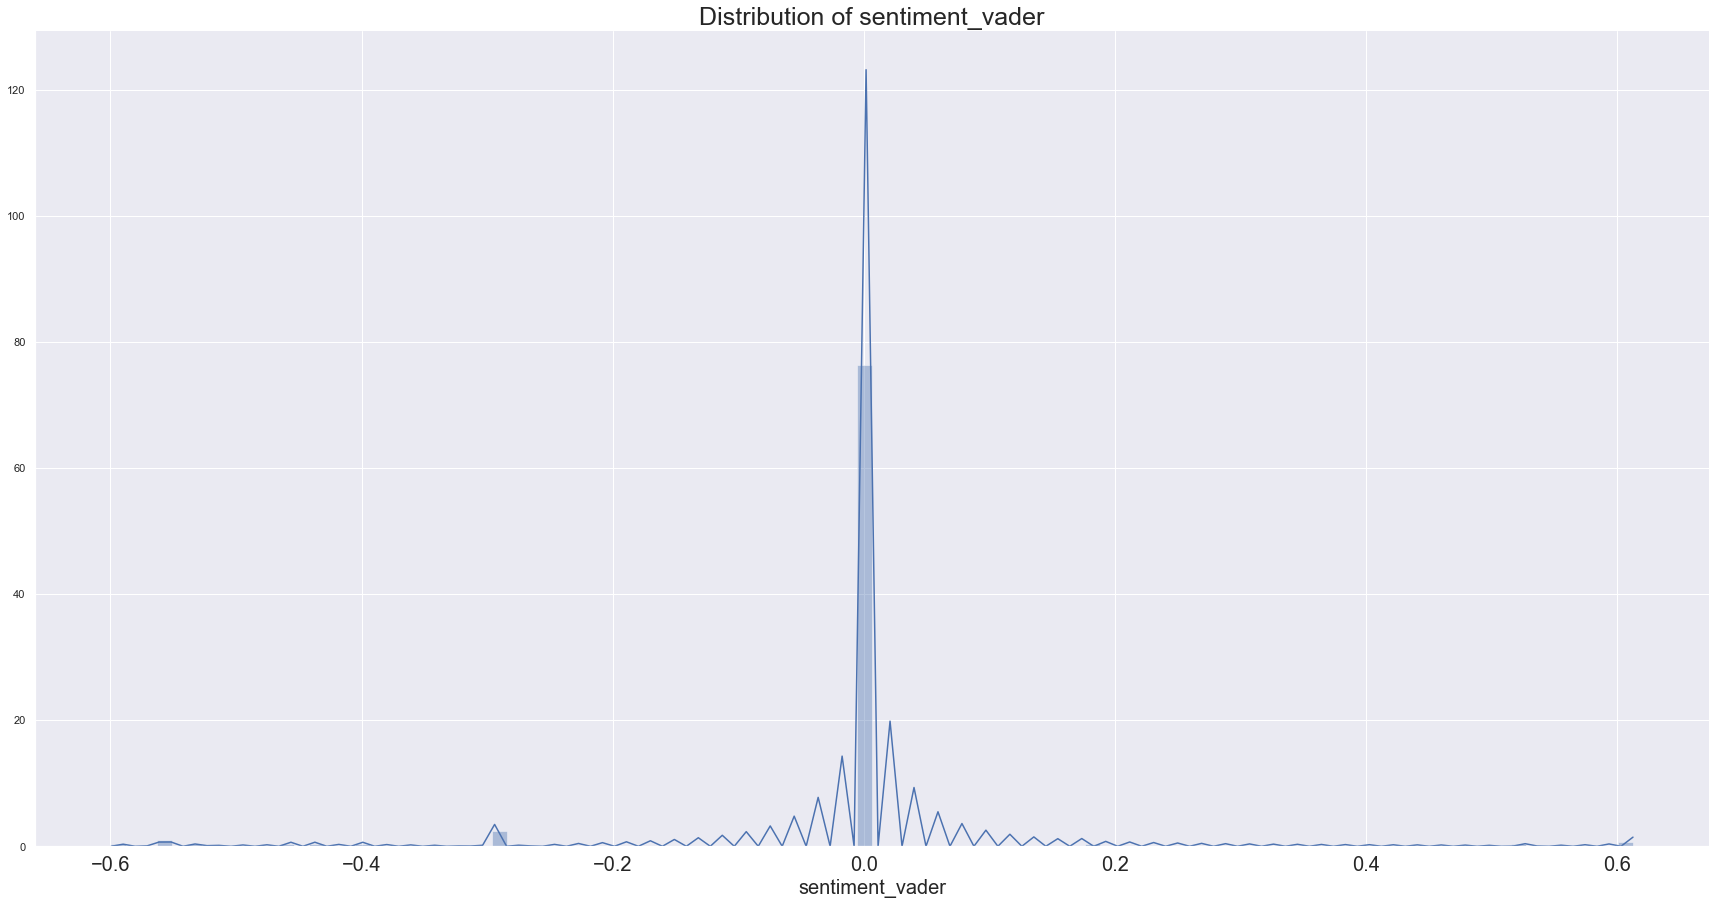

In [121]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.distplot(df.sentiment_vader, bins=100)
plt.xlabel('sentiment_vader', fontsize=20)
plt.title('Distribution of sentiment_vader', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();


/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


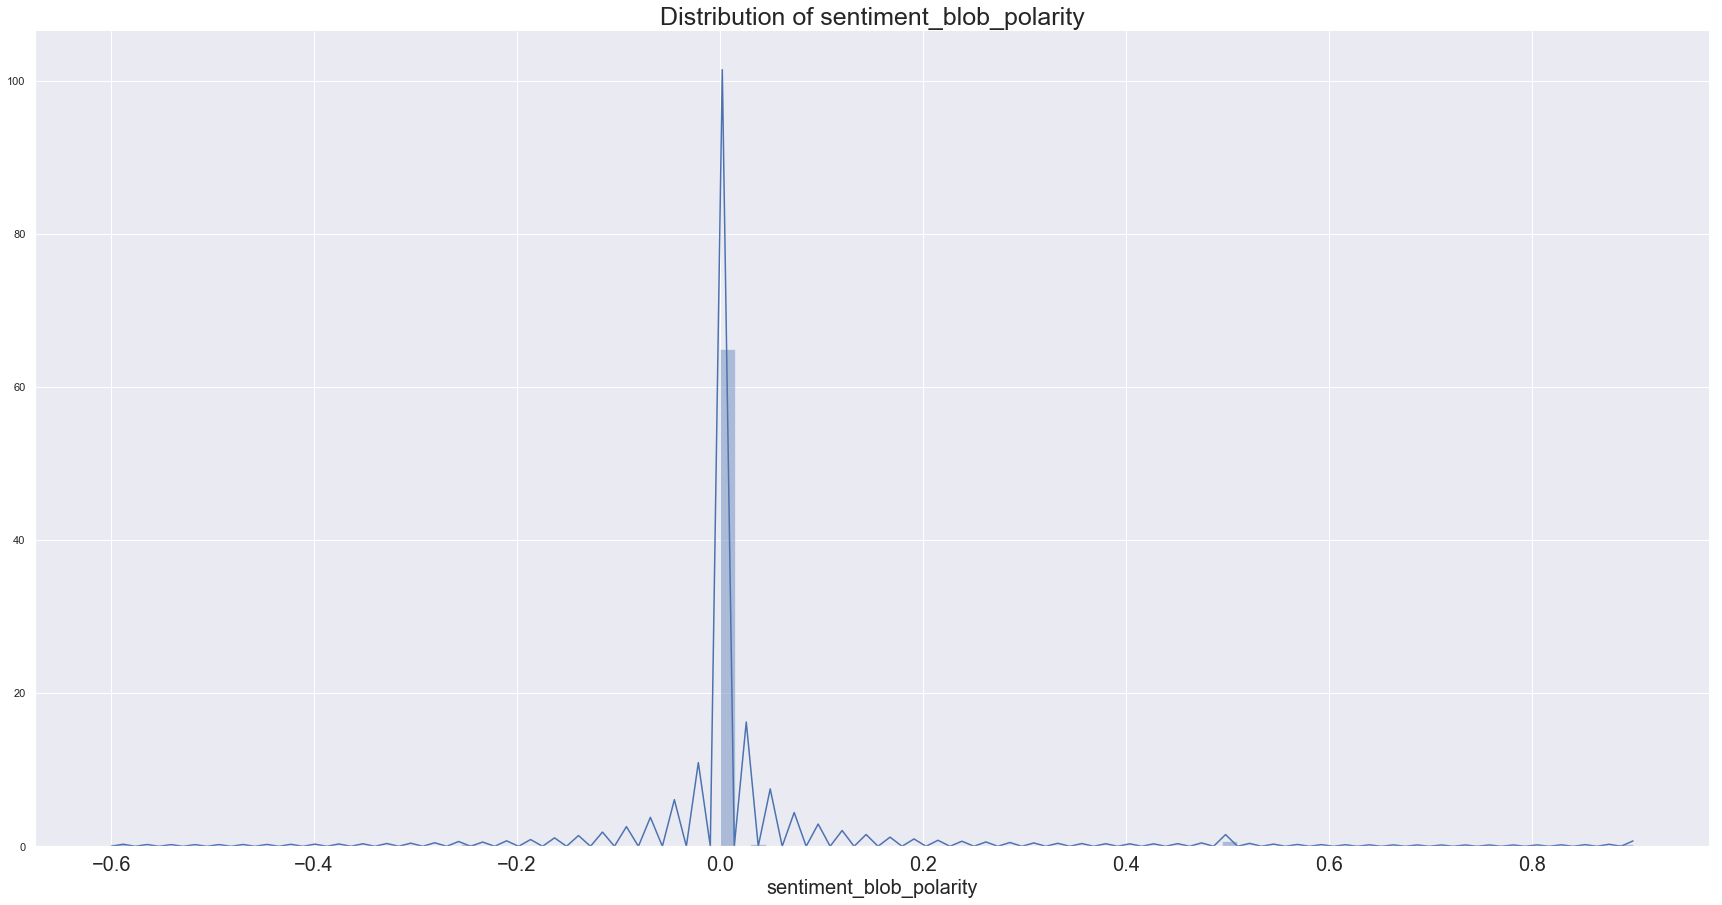

In [123]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.distplot(df.sentiment_blob_polarity, bins=100)
plt.xlabel('sentiment_blob_polarity', fontsize=20)
plt.title('Distribution of sentiment_blob_polarity', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();

/Users/alex/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


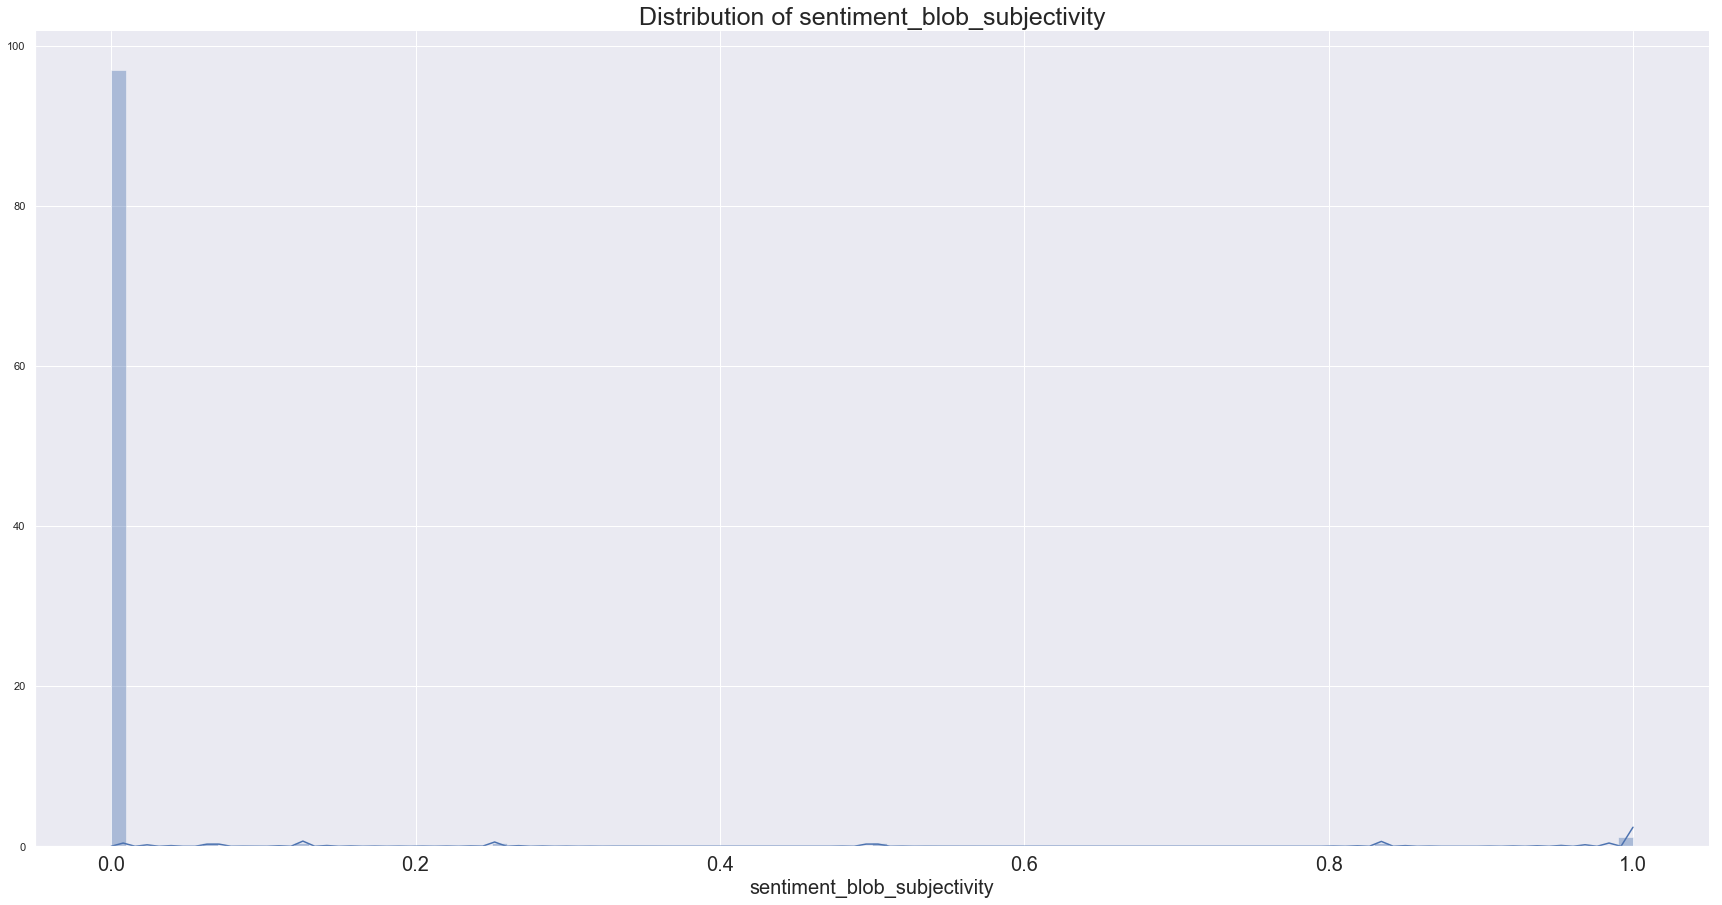

In [125]:
fig, ax = plt.subplots(figsize=(30,15))
ax = sns.distplot(df.sentiment_blob_subjectivity, bins=100)
plt.xlabel('sentiment_blob_subjectivity', fontsize=20)
plt.title('Distribution of sentiment_blob_subjectivity', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
sns.despine()
plt.plot();

Not very useful... let's leave it at that for the moment

For the Keywords, seven meta-level features are computed which include: the number of keywords, and keyword length

In [185]:
df['tags'] = df['tags'].apply(str).apply(lambda x: '' if x=='nan' else x)

In [191]:
df['n_keywords'] = 0
df['keyword_length'] = 0.0

In [192]:
for i, row in df.iterrows():
    if row['tags']:
        tags = row['tags'].split(',')
        df.at[i, 'n_keywords'] = len(tags)
        df.at[i, 'keyword_length'] = sum( map(len, tags) ) / len(tags)
        clear_output(wait=True)
        print(i, row['title'], sum( map(len, tags) ) / len(tags))

264 Performance | Saxaje | TEDxRiodelaPlataED 9.4


In addition, to the above 49 meta-level features, we also include auxiliary user meta-level features including: the number of subscribers, resolution of the thumbnail used, category of the video, the length of the video, and the first day view count of the video. 

In [195]:
df.columns

Index(['event_name', 'video_id', 'title', 'url_thumb', 'tags', 'view_count',
       'like_count', 'dislike_count', 'comment_count', 'created', 'blurriness',
       'brightness', 'contrast', 'overexposure', 'entropy', 'avg_color',
       'word_count', 'punctuation_count', 'character_count', 'google_hits',
       'sentiment_vader', 'sentiment_blob_polarity',
       'sentiment_blob_subjectivity', 'n_keywords', 'keyword_length'],
      dtype='object')